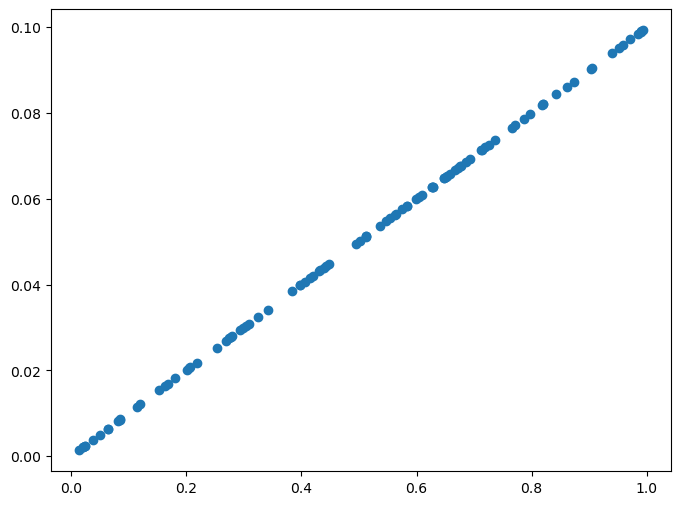

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.random.rand(100)
y =  0.2 * X * 0.5  # 0.2X * 0.5
plt.figure(figsize = (8, 6))
plt.scatter(X, y)
plt.show()

In [22]:
def plt_prediction(pred, y):
    plt.figure(figsize = (8,6))
    plt.scatter(X, y, color = 'blue', label = 'Actual')
    plt.scatter(X, pred, color = 'orange', label = 'prediction')
    plt.legend()
    plt.show

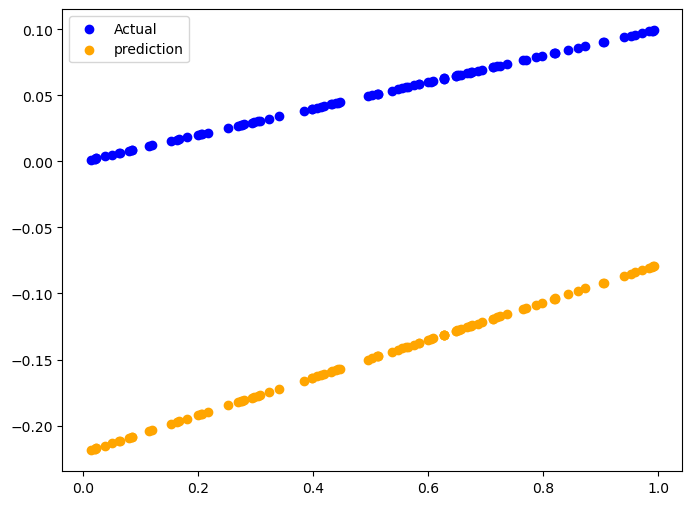

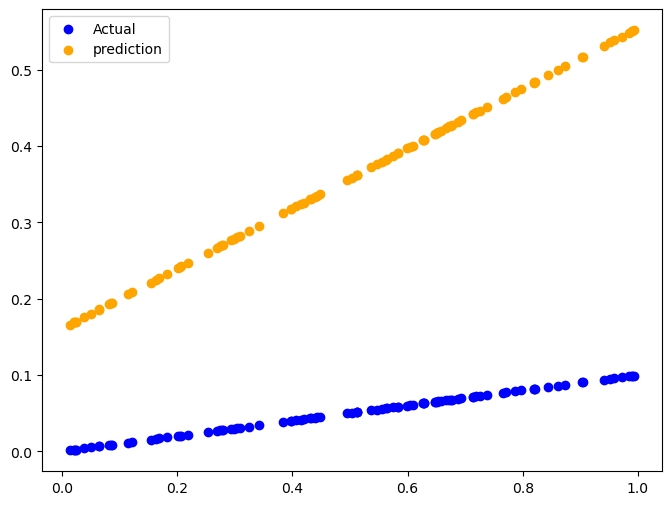

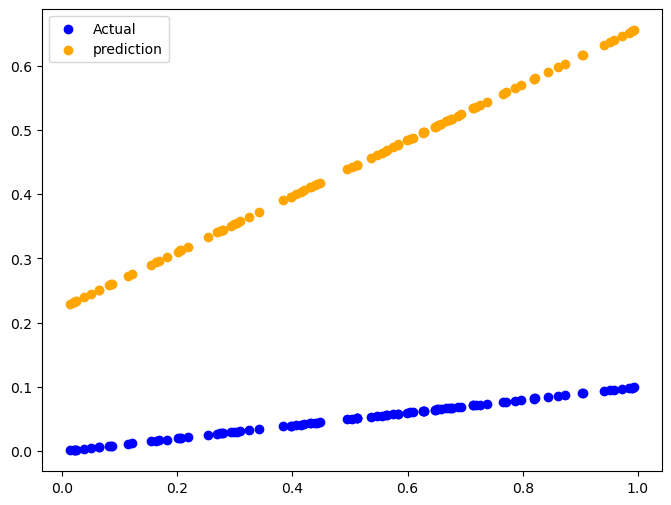

In [36]:
## 단순경사하강법 y = WX + b
W = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
learning_rate = 0.8 # 학습률

for epoch in range(100):
    y_pred = W * X * b # 예측 함수
    error = np.abs(y_pred - y).mean() # 절대값을 이용한 손실함수(RAS)

    if error < 0.001 :
        break # 오차가 0에 가까워지면 반복 종료

    # 새로운 W를 찾는다 > W_update
    W_descent = learning_rate * ((y_pred - y) * X).mean()
    b_descent = learning_rate * ((y_pred - y)).mean()

    W = W - W_descent # 기울기 반대방향으로 적용
    b = b - b_descent
    
    if epoch % 10 == 0 :
        y_pred = W * X + b
        plt_prediction(y_pred, y)
    

### LinearRegression을 이용한 보스턴 주택 가격 예측 모델

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings

In [38]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
boston_df = pd.DataFrame(data = load_boston().data
                         , columns= load_boston().feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
boston_df['Price'] = load_boston().target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


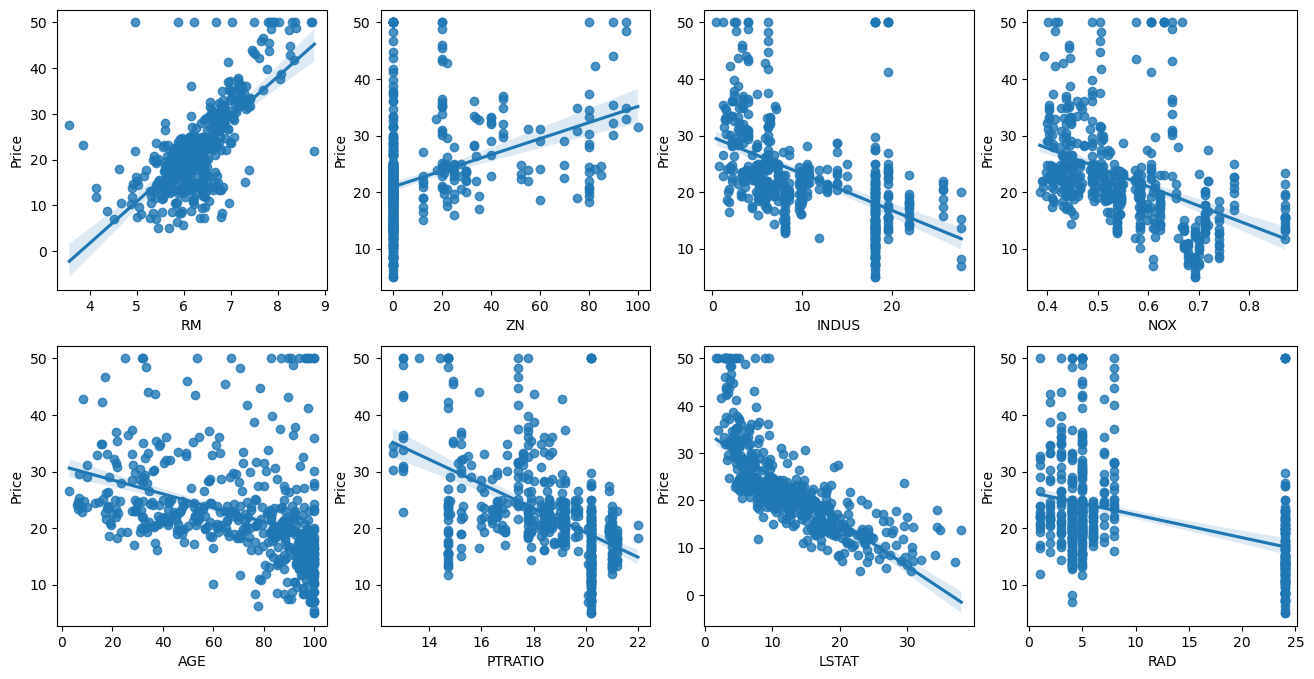

In [65]:
fig, axs = plt.subplots(figsize = (16,8)
                        , ncols = 4
                        , nrows = 2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4

    # Seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature
                , y='Price'
                , data = boston_df
                , ax = axs[row][col])
    

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['Price']
X_data = boston_df.drop('Price'
                        , axis =1
                        , inplace = False)

X_train, X_test, y_train, y_test = \
train_test_split(X_data
                 , y_target
                 , test_size=0.3
                 , random_state=156)

In [82]:
# 선형 회귀 OLS로 학습/예측 평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print(f'''
mse(평균제곱오차) : {mse:.4f}
rmse(평균제곱근오차) : {rmse:.4f}
r2_square(결정계수) : {r2:.4f}
'''
)


mse(평균제곱오차) : 17.2969
rmse(평균제곱근오차) : 4.1590
r2_square(결정계수) : 0.7572



In [83]:
coeff = pd.Series(data= np.round(lr.coef_, 1) #.coef는 학습된 기울기
                , index = X.columns
                )

coeff.sort_values(ascending=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [90]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr
                                , X_data
                                , y_target
                                , scoring = 'neg_mean_squared_error'
                                , cv = 5)

rmse = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse)

print(f'''
개별 Negative Mean Scores : {neg_mse_scores}      
RMSE scores : {rmse}
평균 RMSE : {avg_rmse}
      ''')


개별 Negative Mean Scores : [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]      
RMSE scores : [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
평균 RMSE : 5.828658946215839
      


In [96]:
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환
poly = PolynomialFeatures(degree= 2)
poly.fit(X)
poly_ftr = poly.transform(X)

print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [97]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [98]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [-0.    0.18  0.18  0.36  0.54  0.72  0.72  1.08  1.62  2.34]
Polynomial 회귀 Shape :  (10,)


In [100]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3*X[:,0]**2 + 4*X[:, 1] ** 3
    return y

# Pipeline 객체로 Streamline하게 polynomial Feature 변환과  Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])




Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])